## An example of the Shmidt decomposition.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from shmidt import shmidt_decomp

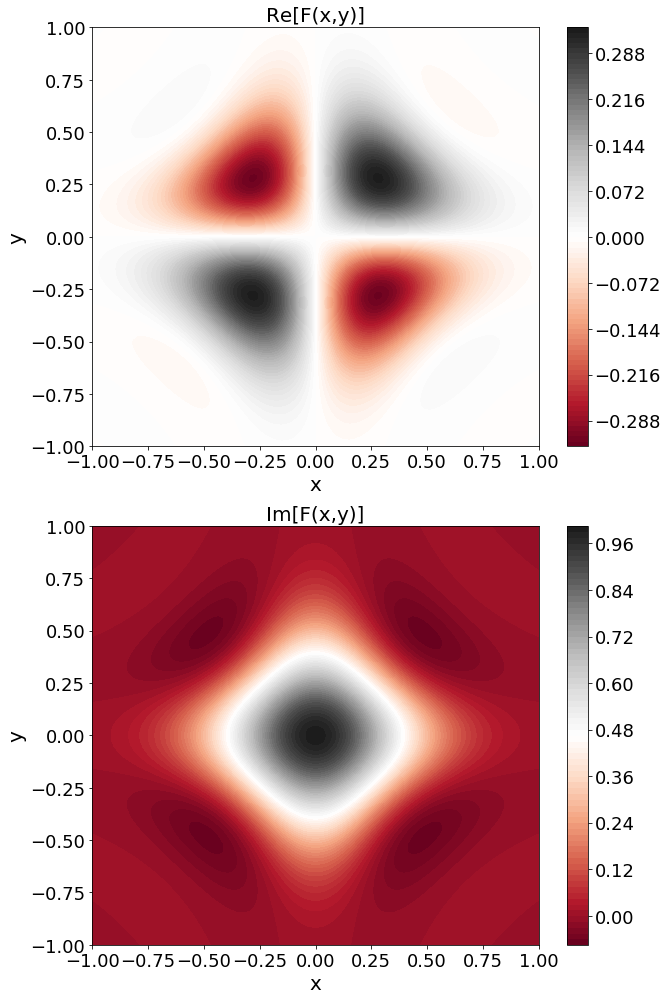

In [27]:

def f(x, y):
    return np.exp(-(x**2 + y**2)/0.2) * (np.sin(x*y/0.1) + 1j * np.cos(x*y/0.1))

grd = 100
x = np.linspace(-1, 1, grd)
y = np.linspace(-1, 1, grd)

X, Y = np.meshgrid(x, y)
F = f(X, Y)


fig = plt.figure(figsize=(9.4, 14))
plt.subplot(211)
plt.contourf(X, Y, np.real(F), 100, cmap='RdGy')
plt.title('Re[F(x,y)]', fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.subplot(212)
plt.contourf(X, Y, np.imag(F), 100, cmap='RdGy')
plt.title('Im[F(x,y)]', fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('files/func.png', dpi=90, box_inches='tight')
plt.show()


In [28]:
# Decomposition.
modes1, modes2, eigvals, phases = shmidt_decomp(F, modes_num=40)


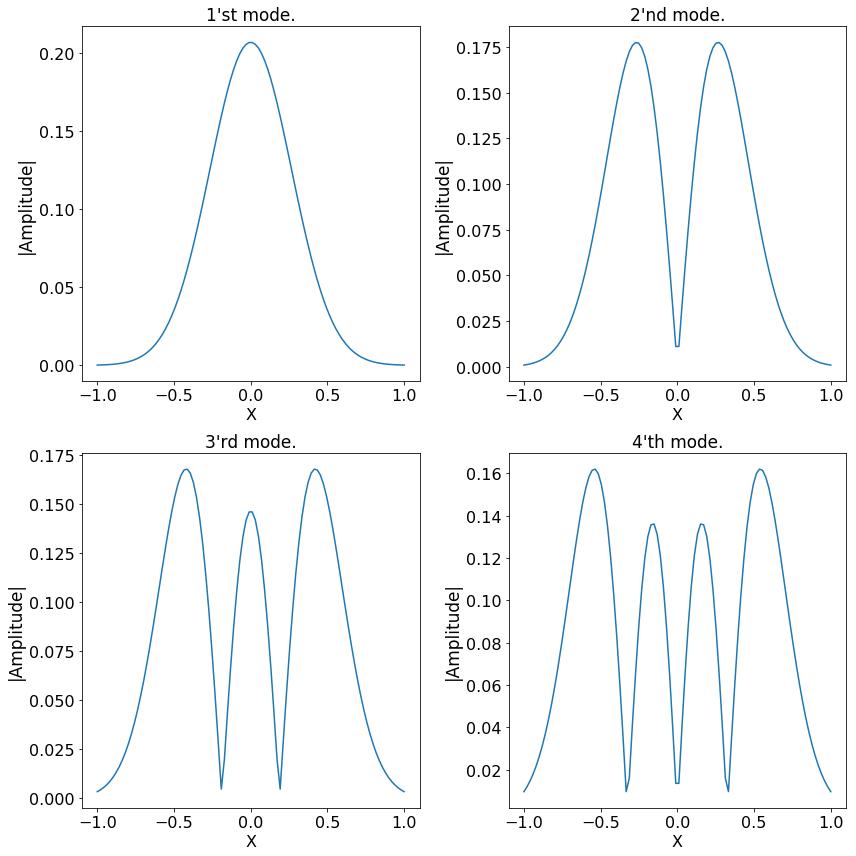

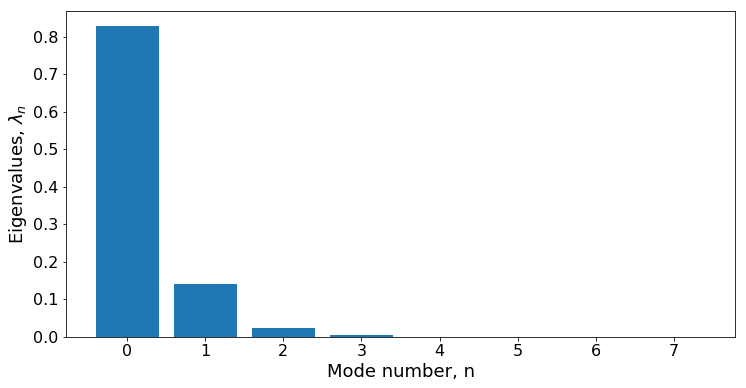

In [39]:
# Plotting modes and eigenvalues.
fig = plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.plot(x, np.abs(modes1[0, :]))
plt.xlabel('X', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks(fontsize=16)
plt.title("1'st mode.", fontsize=17)
plt.ylabel('|Amplitude|', fontsize=17)
plt.subplot(222)
plt.plot(x, np.abs(modes1[1, :]))
plt.xlabel('X', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks(fontsize=16)
plt.title("2'nd mode.", fontsize=17)
plt.ylabel('|Amplitude|', fontsize=17)
plt.subplot(223)
plt.plot(x, np.abs(modes1[2, :]))
plt.xlabel('X', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks(fontsize=16)
plt.title("3'rd mode.", fontsize=17)
plt.ylabel('|Amplitude|', fontsize=17)
plt.subplot(224)
plt.plot(x, np.abs(modes1[3, :]))
plt.xlabel('X', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks(fontsize=16)
plt.title("4'th mode.", fontsize=17)
plt.ylabel('|Amplitude|', fontsize=17)
plt.tight_layout()
plt.savefig('files/modes.png', dpi=70, box_inches='tight')
plt.show()


fig2 = plt.figure(figsize=(12, 6))
ev = eigvals[:8]
plt.bar(np.arange(len(ev)), ev)
plt.ylabel(r'Eigenvalues, $\lambda_{n}$', fontsize=18)
plt.xlabel('Mode number, n', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('files/eigvalues.png', dpi=70, box_inches='tight')
plt.show()


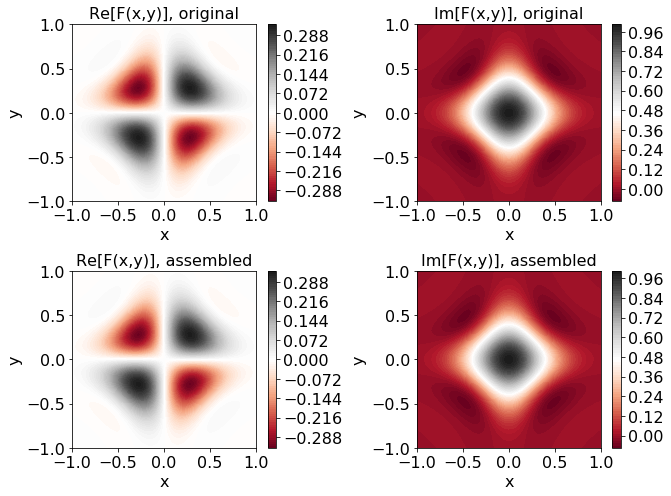

In [38]:
# Assembling initial function back to check the decomposition.

f_combined = np.zeros((grd, grd), dtype=complex)

for n in range(40):
    f_combined += np.sqrt(eigvals[n]) * phases[n] * np.tensordot(modes1[n, :], modes2[n, :], axes=0)


fig = plt.figure(figsize=(9.4, 7))
plt.subplot(221)
plt.contourf(X, Y, np.real(F), 100, cmap='RdGy')
plt.title('Re[F(x,y)], original', fontsize=16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.subplot(222)
plt.contourf(X, Y, np.imag(F), 100, cmap='RdGy')
plt.title('Im[F(x,y)], original', fontsize=16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.subplot(223)
plt.contourf(X, Y, np.real(f_combined), 100, cmap='RdGy')
plt.title('Re[F(x,y)], assembled', fontsize=16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.subplot(224)
plt.contourf(X, Y, np.imag(f_combined), 100, cmap='RdGy')
plt.title('Im[F(x,y)], assembled', fontsize=16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=16)
plt.tight_layout()
plt.savefig('files/assembly.png', dpi=90, box_inches='tight')
plt.show()
